# Анализ исторических данных о продажах видеоигр

Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
У меня есть данные до 2016 года. Сейчас декабрь 2016 г., и я планирую кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозирую ли я продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года

# Цель проекта

Запланировать успешную кампанию на 2017-й год. Мне нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Изучение данных из файла

Импортируем библиотеки. Прочтем файл при помощи библиотеки Pandas и сохраним в датафрейм

In [2]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt # импорт библиотеки matplotlib
import seaborn as sns # импорт библиотеки seaborn
import numpy as np # импорт библиотеки numpy
from scipy import stats as st # импорт библиотеки stats

In [3]:
df = pd.read_csv('/datasets/games.csv', sep=',') # чтение файла с данными и сохранение в df

In [4]:
df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.head(10) # посмотрим на первые 10 строк в таблице df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


##  Предобработка данных

Приведем к нижнему регистру названия столбцов

In [6]:
df.columns = df.columns.str.lower() # приводим к нижнему регистру

In [7]:
df.columns # проверяем название столбцов

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Считаем количесвто пропусков

In [8]:
df.isna().sum()  # считаем пропуски

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Обрабатываем пропуски

In [9]:
df['critic_score']=df['critic_score'].fillna(-1) #ставим  заглушку
df['user_score']=df['user_score'].fillna(-1) #ставим  заглушку
df['rating']=df['rating'].fillna('no_rating') #  прописываем что рейтинга нет
df['name']=df['name'].fillna(0)  #ставим  заглушку для удаления
df['genre']=df['genre'].fillna(0) #ставим  заглушку для удаления
df['year_of_release']=df['year_of_release'].fillna(0) #ставим  заглушку

Проверяем наличие пропусков

In [10]:
df.isna().sum() # считаем пропуски еще раз

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Найдем игры без названия  и жанра

In [11]:
df.query('name==0 and genre==0') # создаем срез, где есть пропуски

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,0,GEN,1993.0,0,1.78,0.53,0.00,0.08,-1.0,-1,no_rating
14244,0,GEN,1993.0,0,0.00,0.00,0.03,0.00,-1.0,-1,no_rating


Удалим из датафрейма эти игры

In [12]:
df.drop(labels = [659,14244],axis = 0) # удаляем эти игры

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,no_rating
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,no_rating
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1,no_rating
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1,no_rating
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1,no_rating
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1,no_rating


Посмотрим на уникальные значения в столбце 'user_score'

In [13]:
df['user_score'].value_counts() # находим уникальные значения

-1     6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1         2
1.1       2
0.5       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

to be done - рейтинга ещё нет, оставляем  это значение

Изменяем тип данных

In [14]:
df = df.astype({'year_of_release': 'int', 'critic_score': 'int'}) # изменяем тип

Проверяем датафрейм на наличие дубликатов

In [15]:
df.duplicated().sum() # проверяем на дубликаты датафрейм 

0

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [16]:
df['total_sales']=df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] # создаем колонку с общей выручкой 

In [17]:
df.head()  # выводим первые 5 записей

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1,no_rating,31.38


## Иследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы

Text(0, 0.5, 'Количесвто игр')

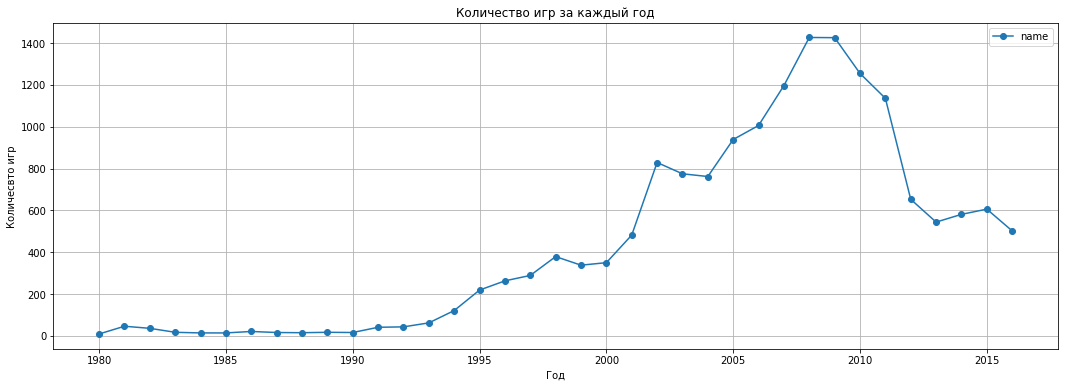

In [18]:
allyear = df.pivot_table(index='year_of_release', values='name', aggfunc='count')  # создаем сводную  таблицу
allyear = allyear.query('year_of_release != 0') # вспоминаем  про заглушку
allyear.plot(grid=True, style='o-', figsize=(18,6)) # строим график
plt.title('Количество игр за каждый год')
plt.xlabel('Год')
plt.ylabel('Количесвто игр')

На графике мы видим что пик вышедших игр приходится на 2008 и 2009 год. С 1993 года мы видим резский прирост видеоигр.

Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам

Text(0.5, 1.0, 'Количество игр для каждой консоли по годам')

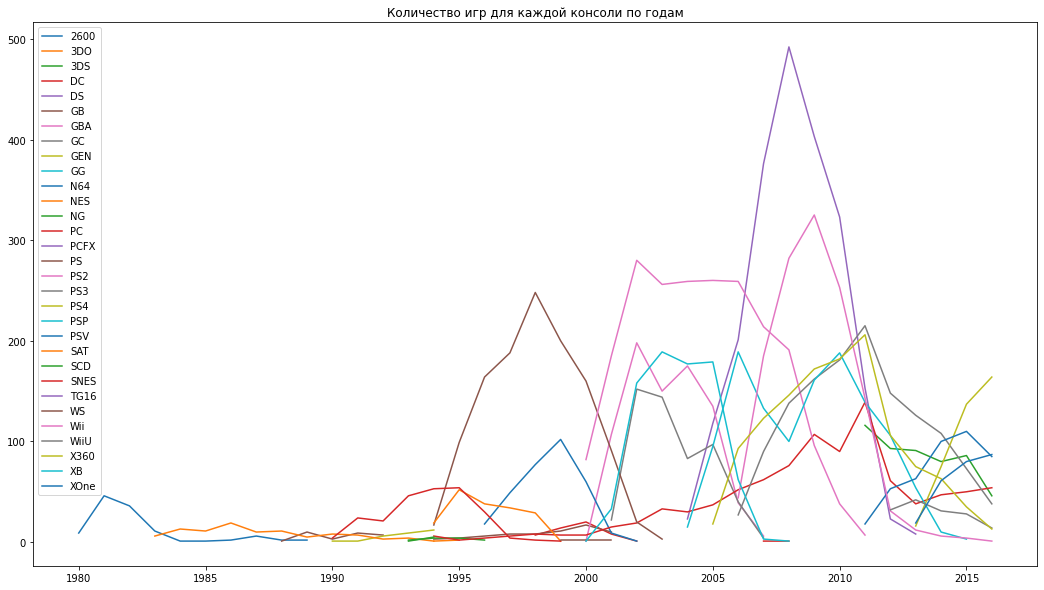

In [19]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
plot_pivot= df.pivot_table( index='year_of_release', columns='platform', values='name', aggfunc='count').query('year_of_release != 0')
ax.plot(plot_pivot)
ax.legend(plot_pivot.columns)
fig.show()
plt.title('Количество игр для каждой консоли по годам')

Text(0.5, 1.0, 'Количество игр для 7ого поколения консолей по годам')

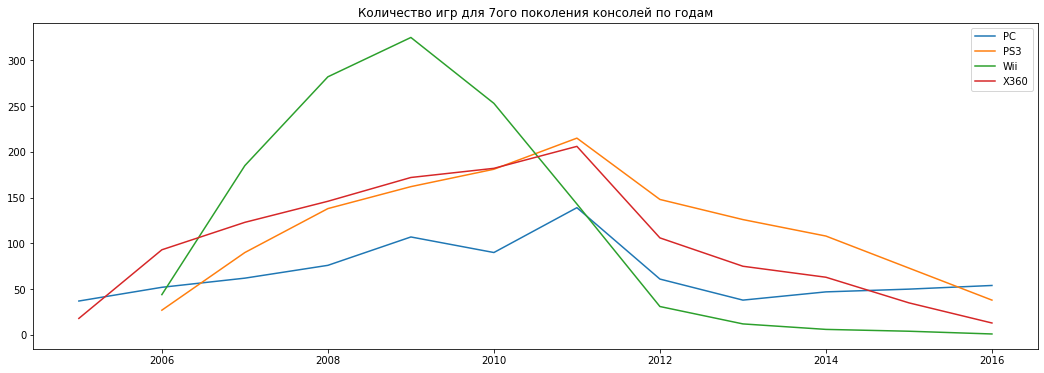

In [20]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
plot_pivot= df.query('year_of_release != 0 and platform in ("PC","X360","PS3","Wii") and year_of_release > 2004').pivot_table( index='year_of_release', columns='platform', values='name', aggfunc='count')
ax.plot(plot_pivot)
ax.legend(plot_pivot.columns)
fig.show()
plt.title('Количество игр для 7ого поколения консолей по годам')

Text(0.5, 1.0, 'Количество игр для 8ого поколения консолей по годам')

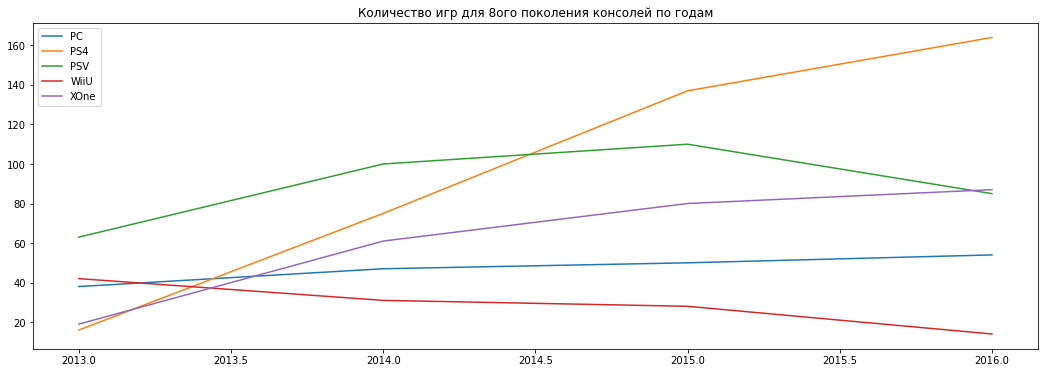

In [21]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
plot_pivot= df.query('year_of_release != 0 and platform in ("PC","XOne","PS4","WiiU","PSV") and year_of_release > 2012').pivot_table( index='year_of_release', columns='platform', values='name', aggfunc='count')
ax.plot(plot_pivot)
ax.legend(plot_pivot.columns)
fig.show()
plt.title('Количество игр для 8ого поколения консолей по годам')

In [22]:
df.pivot_table(index='platform', values='name', aggfunc='count').sort_values(by='name', ascending=False).head(10) # создаем сводную таблицу по популярным консолям 

,name
platform,
PS2,2161
DS,2151
PS3,1331
Wii,1320
X360,1262
PSP,1209
PS,1197
PC,974
XB,824


Самая популярная консоль по количесвту игр PS2. Поколение консолей живет примерно 7-8 лет.

Возьмем данные за соответствующий актуальный период. Актуальным периодом можно считать время, когда вышли консоли нового поколения (PS4, XboxONE, WiiU, PSV)

In [23]:
new_df=df.query('year_of_release >= 2015') # создаем срез по актуальным играм 

In [24]:
new_df.head(10) # выводим  первые 10  записей датафрейма

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1,no_rating,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1,no_rating,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-1,-1,no_rating,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,-1,-1,no_rating,7.14
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93,7.9,T,5.39
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86,8.1,T,4.62
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49


Посмотрим на потенциально прибыльные платфоры после 2012 года

Text(0.5, 1.0, 'Выручка игр для каждой актуальной консоли по годам')

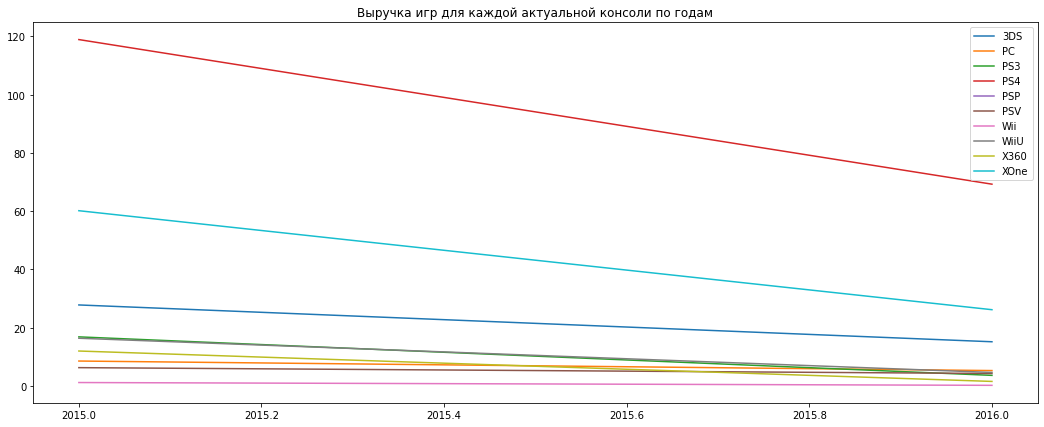

In [25]:
fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot(111)
plot_pivot= new_df.pivot_table( index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').query('year_of_release != 0')
ax.plot(plot_pivot)
ax.legend(plot_pivot.columns)
fig.show()
plt.title('Выручка игр для каждой актуальной консоли по годам')

По графику видно, что самой популярной консолью является PS4 и XboxONE. Так же видно что популярность консолей предыдущего поколения падает. Разработчики выпускают все меньше игр на не актуальные консоли

In [26]:
new_df = new_df.query('platform in ("PC","XOne","PS4","WiiU","PSV")')  # создаем срез по популярным консолям

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [27]:
new_df['total_sales'].describe() # выводим информацию столбца   

count    809.000000
mean       0.395130
std        1.040912
min        0.010000
25%        0.030000
50%        0.070000
75%        0.280000
max       14.630000
Name: total_sales, dtype: float64

(0.0, 2.0)

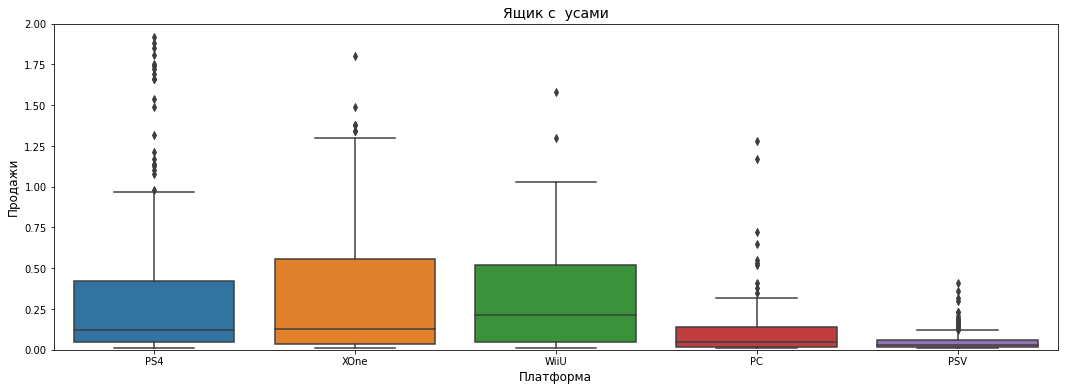

In [28]:
plt.figure(figsize=(18,6))
sns.boxplot(data=new_df,  x='platform', y='total_sales')
plt.title('Ящик с  усами', fontsize=14)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи', fontsize=12)
plt.ylim(0,2)

Не удивительно, что PS4 лидирует по популярности среди других консолей

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

In [50]:
PS4_df = new_df.query('platform == "PS4" and critic_score != -1 and user_score != -1 and user_score !="tbd"') # делаем срез по самой популярной платформе
PS4_df['user_score'] = PS4_df['user_score'].astype('float') # переводим тип в float
PS4_df['user_score'] = PS4_df['user_score'] * 10 # переводим в 100 бальную систему

/tmp/ipykernel_42/3416978602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS4_df['user_score'] = PS4_df['user_score'].astype('float') # переводим тип в float
/tmp/ipykernel_42/3416978602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS4_df['user_score'] = PS4_df['user_score'] * 10 # переводим в 100 бальную систему


In [30]:
# Код ревьюера

# Вот пример на массивах, но с df похожая ситуация может произойти
list_1 = [1, 2, 3]
list_2 = list_1
list_2[0] = 4

print('По идее list_1 не должен меняться, но list_1 =', list_1)

list_1 = [1, 2, 3]
list_2 = list_1.copy()
list_2[0] = 4

print('list_1 не изменился, list_1 =', list_1)

По идее list_1 не должен меняться, но list_1 = [4, 2, 3]
list_1 не изменился, list_1 = [1, 2, 3]


In [31]:
PS4_df['critic_score'].describe() # выводим информацию столбца

count    182.000000
mean      71.945055
std       12.686063
min       19.000000
25%       66.000000
50%       73.000000
75%       80.000000
max       93.000000
Name: critic_score, dtype: float64

In [32]:
PS4_df['user_score'].describe() # выводим информацию столбца

count    182.000000
mean      68.587912
std       14.621579
min       15.000000
25%       63.000000
50%       71.500000
75%       79.000000
max       92.000000
Name: user_score, dtype: float64

Text(0, 0.5, 'Оценки  пользователей')

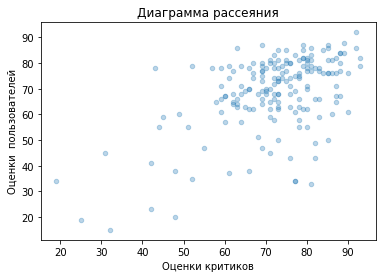

In [33]:
PS4_df.plot(x='critic_score', y='user_score', kind='scatter', alpha=0.3) # строим график рассеяния     
plt.title('Диаграмма рассеяния')
plt.xlabel('Оценки критиков')
plt.ylabel('Оценки  пользователей')

Оценки критиков и пользователей в основном похожи

In [34]:
PS4_df['user_score'].corr(PS4_df['critic_score']) # находим корреляцию 

0.533329910291185

In [35]:
PS4_df['user_score'].corr(PS4_df['total_sales']) # находим корреляцию

-0.06436843081030282

In [36]:
PS4_df['critic_score'].corr(PS4_df['total_sales']) # находим корреляцию

0.39207413696605703

Text(0, 0.5, 'Общие продажи')

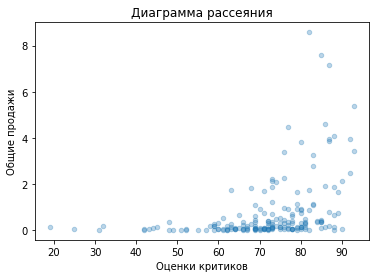

In [37]:
PS4_df.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3) # строим график рассеяния     
plt.title('Диаграмма рассеяния')
plt.xlabel('Оценки критиков')
plt.ylabel('Общие продажи')

Оценка сильно коррелирует с продажами на PS4

In [38]:
new_df = new_df.query('critic_score != -1 and user_score != -1 and user_score !="tbd"') # делаем срез по оценкам
new_df['user_score'] = new_df['user_score'].astype('float') # преобразуем в тип float  
new_df['user_score'] = new_df['user_score'] * 10 # домнажаем, чтобы оценка была по 100 бальной шкале

In [39]:
new_df['critic_score'].corr(new_df['total_sales']) # находим корреляцию

0.32799870943764853

In [40]:
new_df['user_score'].corr(new_df['total_sales']) # находим корреляцию

-0.0190584326743259

Text(0, 0.5, 'Общие продажи')

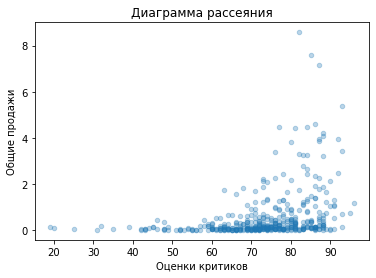

In [41]:
new_df.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3) # строим график рассеяния     
plt.title('Диаграмма рассеяния')
plt.xlabel('Оценки критиков')
plt.ylabel('Общие продажи')

Действительно, продажи игр сильно зависят от оценок критиков не зависимо от консоли

Рассмотрим общее распределение игр по жанрам

In [42]:
top_genre = new_df.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False) # создаем сводную таблицу по популярным жанрам
top_genre

,total_sales
genre,
Shooter,0.455
Misc,0.360
Sports,0.300
Fighting,0.180
Role-Playing,0.160
Action,0.140
Simulation,0.110
Platform,0.100
Strategy,0.080


Text(0, 0.5, 'Общая выручка')

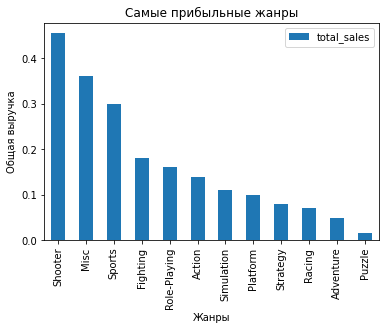

In [43]:
top_genre.plot(kind='bar')
plt.title('Самые прибыльные жанры')
plt.xlabel('Жанры')
plt.ylabel('Общая выручка')

Экшены и шутеры самые популярные и прибыльные жанры. Не просто так Activision Blizzard выпускает каждый год новую серию Call of Duty. Самый не популярный жанр Puzzle, не удивительно

## Составим портрет пользователя каждого региона

Рассмотрим самые прибыльные жанры в зависимости от региона

Text(0, 0.5, 'Общая выручка')

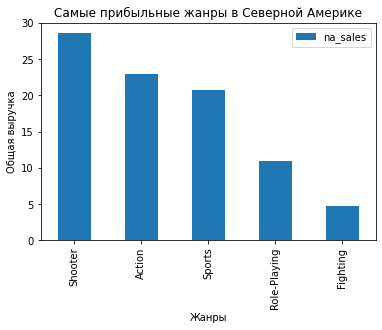

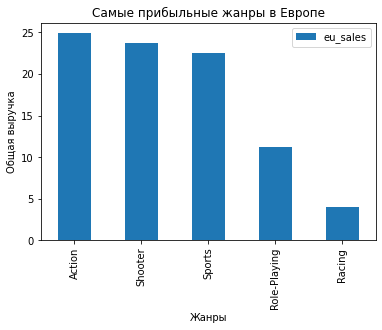

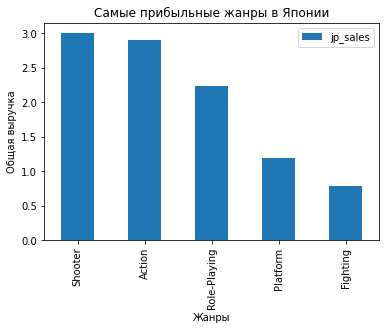

In [44]:
new_df.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head().plot(kind='bar')
plt.title('Самые прибыльные жанры в Северной Америке')
plt.xlabel('Жанры')
plt.ylabel('Общая выручка')
new_df.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head().plot(kind='bar')
plt.title('Самые прибыльные жанры в Европе')
plt.xlabel('Жанры')
plt.ylabel('Общая выручка')
new_df.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head().plot(kind='bar')
plt.title('Самые прибыльные жанры в Японии')
plt.xlabel('Жанры')
plt.ylabel('Общая выручка')

Экшены и шутеры в каждом регионе популярны, в Японии отдают заметно больше предпочтения ролевым играм

Рассмотрим самые прибыльные жанры в зависимости от региона

Text(0, 0.5, 'Общая выручка')

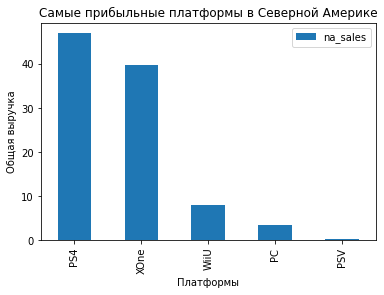

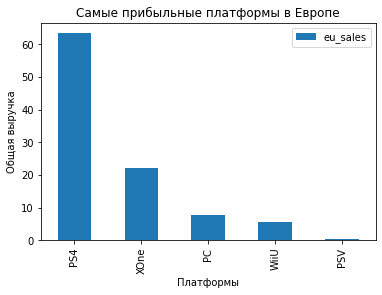

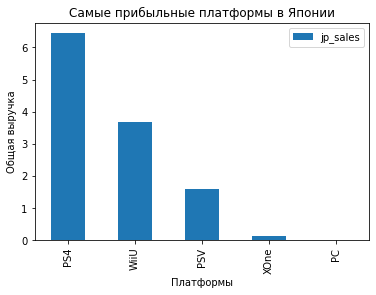

In [45]:
new_df.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head().plot(kind='bar')
plt.title('Самые прибыльные платформы в Северной Америке')
plt.xlabel('Платформы')
plt.ylabel('Общая выручка')
new_df.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head().plot(kind='bar')
plt.title('Самые прибыльные платформы в Европе')
plt.xlabel('Платформы')
plt.ylabel('Общая выручка')
new_df.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head().plot(kind='bar')
plt.title('Самые прибыльные платформы в Японии')
plt.xlabel('Платформы')
plt.ylabel('Общая выручка')

В каждом регионе самой  популярной консолью является playstation 4. В Штатах очень популярен XboxOne, а в Японии Nintendo WIIU

Рассмотрим самые популярные рейтинги в зависимости от региона

Text(0, 0.5, 'Общая выручка')

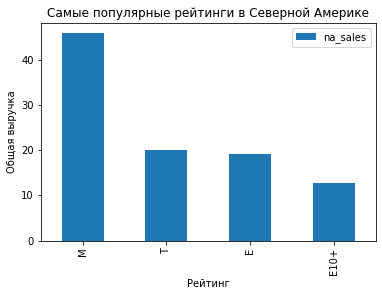

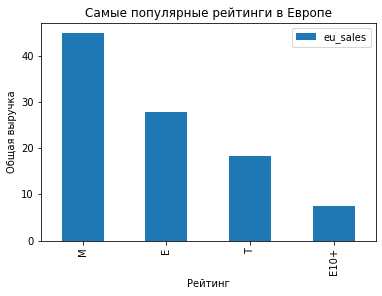

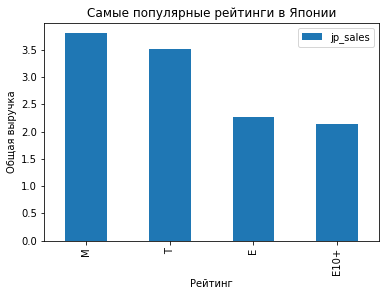

In [46]:
new_df.query('rating != "no_rating"').pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).plot(kind='bar')
plt.title('Самые популярные рейтинги в Северной Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Общая выручка')
new_df.query('rating != "no_rating"').pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).plot(kind='bar')
plt.title('Самые популярные рейтинги в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Общая выручка')
new_df.query('rating != "no_rating"').pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).plot(kind='bar')
plt.title('Самые популярные рейтинги в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Общая выручка')

Европейский и Северо Американский рынок очень похожи, а вот Япония отличается от других в зависимости от рейтинга. В Японии видимо более молодая аудитория, там лидирует рейтинг Teen

## Проверим гипотезы 

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нулевая гипотеза: средний пользовательский рейтинг для платформы Xbox One и PC равны. Альтернативная гипотеза: средний пользовательский рейтинг для платформы Xbox One и PC не равны. Используем для двух генеральных совокупностей st.ttest_ind

In [47]:
xbox = new_df.query('platform == "XOne"') # Задаем срез для xbox
pc = new_df.query('platform == "PC"') # Задаем срез для PC 
alpha = 0.05 # задаем критический уровень статистической значимости

result_fist = st.ttest_ind(xbox['user_score'], pc['user_score'], equal_var=False)

print('p-значение:', result_fist.pvalue) # выведите на экран полученное p-значение)

if result_fist.pvalue < alpha:# сравните p-значение с заданным критическим уровнем стат. значимости:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.34313383886279314
Не получилось отвергнуть нулевую гипотезу


Действительно, средний пользовательский рейтинг на платформах Xbox One и PC очень похож друг на друга

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Нулевая гипотеза: средний пользовательский рейтинг жанров Action и Sports равны. Альтернативная гипотеза: средний пользовательский рейтинг жанров Action и Sports не равны. Используем для двух генеральных совокупностей st.ttest_ind

In [48]:
action = new_df.query('genre == "Action"') # Задаем срез для action
sports = new_df.query('genre == "Sports"') # Задаем срез для sports 
alpha = 0.05 # задаем критический уровень статистической значимости

result_fist = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)

print('p-значение:', result_fist.pvalue) # выведите на экран полученное p-значение)

if result_fist.pvalue < alpha:# сравните p-значение с заданным критическим уровнем стат. значимости:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1072621953343472e-05
Отвергаем нулевую гипотезу


А вот у жанров Action и Sports среднепользовательский рейтинг сильно отличается друг от друга

##  Общий вывод

Мы провели большую работу по анализу данных видеоигр. Посмотрели как изменялась игровая индустрия  за последние 35 лет: как консоли прихоли и уходили с рынка,  какую  выручку приносила  эта  индустрия с течением времени. Нам получилось выявить самые популярные жанры, консоли, рейтинги  в  зависимости   от региона. Расмотрели как оценки критиков и пользователей влияют  на  продажи игр и коррелируют между  собой. А так же мы проверили 2 гипотезы. Из всего этого мы выявили следующую закономерность, которая нам поможет провести  хорошую рекламную кампанию в 2017 году: нужно делать акцент на видеоигры в жанре Action либо Shooter, с рейтингом M, выпускаемые на самых популярных платформах: PS4, XOne, PC. 